<a href="https://colab.research.google.com/github/Mateorovere/Wine_Quality_Classification/blob/main/Wine_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("winequality-red.csv", sep=";")
x_train, x_test, y_train, y_test = train_test_split(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']], df['quality'], test_size = 0.1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=9000)
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
model.predict([[9.0,	0.390,	0.40,	1.3,	0.044,	25.0,	50.0,	0.99478,	3.20,	0.83,	10.9]])

# Now try with NN

In [9]:
import pandas as pd

red_wine = pd.read_csv('winequality-red.csv',sep=';')

# Create training and validation splits
df_train = red_wine.sample(frac=0.8, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

# 11 values as input to predict quality
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)


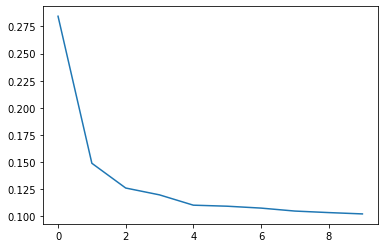

In [14]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();